# DNP Buildup Analysis

In [42]:
import sys

import pyNMR.model.parser.rs2d as R
import pyNMR.model.processor as P
import pyNMR.model.operations as O

import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
path = "./data/RS2D/1/"


Left Shift
Exponential Linebroadening
LB: 5000.0 Hz
Fourier Transform
Phase Zero Order
Baseline Correction
BaselineCorrection done. Polynomial: poly1d([-6.55551159e-10, -3.87194856e-05,  9.10236861e+02])
Length of nmrData.allSpectra before:  2
Length of nmrData.allSpectra after:  3


(-100.0, 100.0)

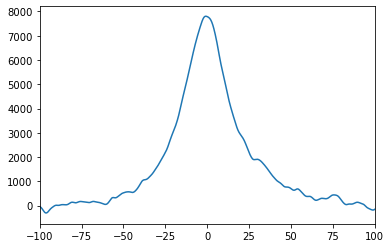

In [48]:
data = R.RS2D(path)

Processor = P.Processor([O.LeftShift(21),
                         O.LineBroadening(5e3),
                         O.FourierTransform(),
                       O.Phase0D(90),
                        O.BaseLineCorrection([[-450e3,-250e3],[250e3,450e3]], 2)
                        ])
Processor.runStack(data)

plt.plot(data.frequency/1e3, np.real(data.allSpectra[-1][5]))
plt.xlim(-100, 100)

#print(data.parDictionary)

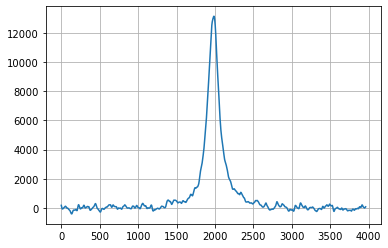

In [47]:
OP = O.GetPartialSpectrum(10, -400e3, 400e3)
spec = OP.run(data)
plt.plot(spec)
plt.grid()

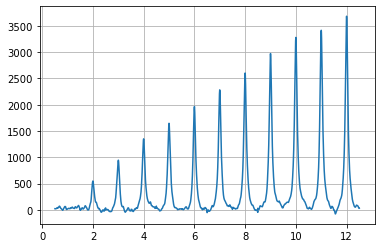

In [41]:
OP = O.GetJoinedPartialSpectra(-200e3, 200e3, returnX=True)
x, spec = OP.run(data)


plt.plot(x, spec)
plt.grid()

In [28]:
print("Length Frequency: ", len(data.frequency))
print("Length Spectrum: ", len(spec))

Length Frequency:  4961
Length Spectrum:  3962


In [17]:
OP = O.GetAllIntegrals(-200e3, 200e3)
OP2 = O.GetAllPhases(-200e3, 200e3, unwrap = True)
myList = OP.run(data)
myPhaseList = OP2.run(data)

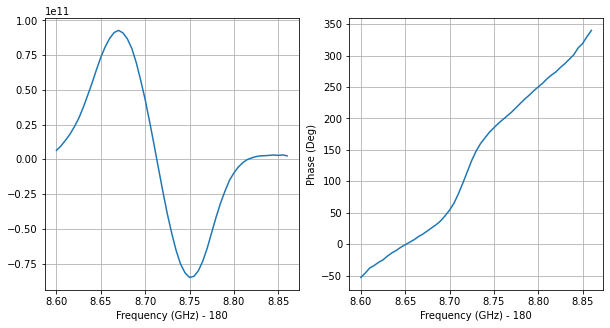

In [21]:
xAxis = np.array([188.6 + 0.005*i for i in range(53)]) - 180

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(xAxis, myList)
plt.xlabel("Frequency (GHz) - 180")
plt.grid()
plt.subplot(1,2,2)
plt.ylabel("Phase (Deg)")
plt.xlabel("Frequency (GHz) - 180")
plt.grid()
plt.plot(xAxis,myPhaseList)

1.0